## Generate time series for specific activities sampled from trainers

This script must be run from the same directory as the scripts which it imports.

In [1]:
%run sys_configs.ipynb

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

np.random.seed(1234)

Read the train set into this script

In [2]:
with open('data/train.npy', 'rb') as f:
    xs_train = np.load(f)
    ys_train = np.load(f)
N, sz, dim = xs_train.shape

Choose 3 activity class labels at random and then choose 1 sample from each.

In [3]:
y1_sample, y2_sample, y3_sample = np.random.choice(np.unique(ys_train), 3)

In [4]:
sample_1_idx = np.random.choice(np.where(ys_train == y1_sample)[0], 1)[0]
sample_2_idx = np.random.choice(np.where(ys_train == y2_sample)[0], 1)[0]
sample_3_idx = np.random.choice(np.where(ys_train == y3_sample)[0], 1)[0]

In [5]:
x1_sample = xs_train[sample_1_idx, :]
x2_sample = xs_train[sample_2_idx, :]
x3_sample = xs_train[sample_3_idx, :]

x1_sample_acc = x1_sample[:, :3]
x1_sample_gyr = x1_sample[:, 3:]

x2_sample_acc = x2_sample[:, :3]
x2_sample_gyr = x2_sample[:, 3:]

x3_sample_acc = x3_sample[:, :3]
x3_sample_gyr = x3_sample[:, 3:]

y1_label = ACTIVITY_MAPPING.get(y1_sample)
y2_label = ACTIVITY_MAPPING.get(y2_sample)
y3_label = ACTIVITY_MAPPING.get(y3_sample)

Plot each of the samples. First plots the set of accelerometer observations, then the set of gyroscope observations.

In [6]:
def plotSample(fig, ax, data, title, cols):
    t = np.arange(500)
    x, y, z = data[:, 0], data[:, 1], data[:, 2]
    x_col, y_col, z_col = cols
    
    max_ = max(max(x), max(y), max(z))
    min_ = min(min(x), min(y), min(z))

    # Plot the x, y and z co-ordinate accelerometer readings
    ax.plot(t, x, color = x_col, label = "x-axis")
    ax.yaxis.label.set_size(2.5)
    ax.plot(t, y, color = y_col, label = "y-axis")
    ax.yaxis.label.set_size(2.5)
    ax.plot(t, z, color = z_col, label = "z-axis")
    ax.yaxis.label.set_size(2.5)
    ax.tick_params(axis='y', labelsize=7.5)

    title = ax.set_title(title)
    title.set_fontsize(7.5) 
    ax.get_yaxis().set_visible(True)
    ax.get_xaxis().set_visible(False)
    ax.set_xticks([])
    ax.legend(loc="upper right", fontsize = 5)

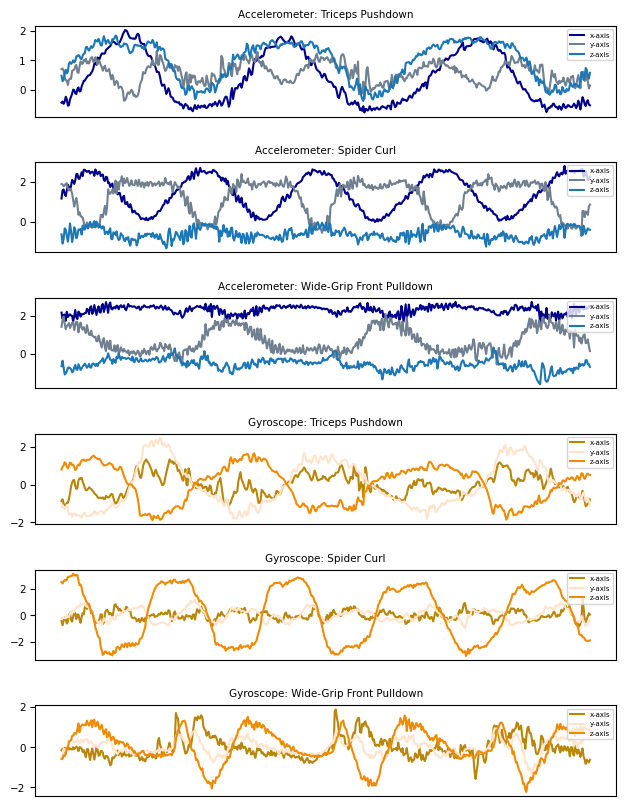

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=6, figsize=(7.5,10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
colours = {"acc": ["#00008B", "#708090", "#1E77B5"], "gyr": ["#B8870A", "#FFE3CA", "#EF8B03"]}

plotSample(fig, ax[0], data = x1_sample_acc, title = f"Accelerometer: {y1_label}", cols = colours.get("acc"))
plotSample(fig, ax[1], data = x2_sample_acc, title = f"Accelerometer: {y2_label}", cols = colours.get("acc"))
plotSample(fig, ax[2], data = x3_sample_acc, title = f"Accelerometer: {y3_label}", cols = colours.get("acc"))

plotSample(fig, ax[3], data = x1_sample_gyr, title = f"Gyroscope: {y1_label}", cols = colours.get("gyr"))
plotSample(fig, ax[4], data = x2_sample_gyr, title = f"Gyroscope: {y2_label}", cols = colours.get("gyr"))
plotSample(fig, ax[5], data = x3_sample_gyr, title = f"Gyroscope: {y3_label}", cols = colours.get("gyr"))

plt.savefig('ActivitySamplesPlots.pdf', dpi = 1000, format = 'pdf', bbox_inches = 'tight')
plt.show()